<a href="https://colab.research.google.com/github/hbgit/tutotensorflow/blob/master/Copy_of_OwnObjDetect.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

The steps needed to create our object detector from gathering the data all the way to testing our newly created object detector

In [1]:
# Libs Dep
!apt-get install protobuf-compiler python-pil python-lxml python-tk
!pip install Cython
!pip install jupyter
!pip install matplotlib

Reading package lists... Done
Building dependency tree       
Reading state information... Done
protobuf-compiler is already the newest version (3.0.0-9.1ubuntu1).
python-tk is already the newest version (2.7.17-1~18.04).
The following package was automatically installed and is no longer required:
  libnvidia-common-430
Use 'apt autoremove' to remove it.
The following additional packages will be installed:
  python-bs4 python-chardet python-html5lib python-olefile
  python-pkg-resources python-six python-webencodings
Suggested packages:
  python-genshi python-lxml-dbg python-lxml-doc python-pil-doc python-pil-dbg
  python-setuptools
The following NEW packages will be installed:
  python-bs4 python-chardet python-html5lib python-lxml python-olefile
  python-pil python-pkg-resources python-six python-webencodings
0 upgraded, 9 newly installed, 0 to remove and 7 not upgraded.
Need to get 1,818 kB of archives.
After this operation, 7,688 kB of additional disk space will be used.
Get:1 http

In [2]:
# Clone tf models
!git clone https://github.com/tensorflow/models.git

Cloning into 'models'...
remote: Enumerating objects: 33768, done.
remote: Total 33768 (delta 0), reused 0 (delta 0), pack-reused 33768
Receiving objects: 100% (33768/33768), 512.11 MiB | 13.33 MiB/s, done.
Resolving deltas: 100% (21609/21609), done.
Checking out files: 100% (3195/3195), done.


**Install the COCO API**

COCO is a large image dataset designed for object detection, segmentation, person keypoints detection, stuff segmentation, and caption generation. 

In [3]:
!git clone https://github.com/cocodataset/cocoapi.git

Cloning into 'cocoapi'...
remote: Enumerating objects: 965, done.
remote: Total 965 (delta 0), reused 0 (delta 0), pack-reused 965
Receiving objects: 100% (965/965), 11.69 MiB | 5.06 MiB/s, done.
Resolving deltas: 100% (574/574), done.


In [4]:
!cd cocoapi/PythonAPI; python3 setup.py build_ext --inplace; cp -r pycocotools /content/models/research/

running build_ext
cythoning pycocotools/_mask.pyx to pycocotools/_mask.c
/usr/local/lib/python3.6/dist-packages/Cython/Compiler/Main.py:369: FutureWarning: Cython directive 'language_level' not set, using 2 for now (Py2). This will change in a later release! File: /content/cocoapi/PythonAPI/pycocotools/_mask.pyx
  tree = Parsing.p_module(s, pxd, full_module_name)
building 'pycocotools._mask' extension
creating build
creating build/common
creating build/temp.linux-x86_64-3.6
creating build/temp.linux-x86_64-3.6/pycocotools
x86_64-linux-gnu-gcc -pthread -DNDEBUG -g -fwrapv -O2 -Wall -g -fstack-protector-strong -Wformat -Werror=format-security -Wdate-time -D_FORTIFY_SOURCE=2 -fPIC -I/usr/local/lib/python3.6/dist-packages/numpy/core/include -I../common -I/usr/include/python3.6m -c ../common/maskApi.c -o build/temp.linux-x86_64-3.6/../common/maskApi.o -Wno-cpp -Wno-unused-function -std=c99
../common/maskApi.c: In function ‘rleDecode’:
../common/maskApi.c:46:7: warning: this ‘for’ clause doe

In [5]:
cd models/research

/content/models/research


In [6]:
# Add necessary environment variables and finish Tensorflow Object Detection API installation
# %set_env PYTHONPATH=/content/models/research:/content/models/research
%set_env PYTHONPATH=/content/models/research:/content/models/research/slim
# %set_env PYTHONPATH=/content/models/research:/content/models/research/object_detection

env: PYTHONPATH=/content/models/research:/content/models/research/slim


In [7]:
!echo $PYTHONPATH

/content/models/research:/content/models/research/slim


Protobuf Installation/Compilation

The Tensorflow Object Detection API uses .proto files. These files need to be compiled into .py files in order for the Object Detection API to work properly. Google provides a programmed called Protobuf that can compile these files.

In [0]:
!protoc object_detection/protos/*.proto --python_out=.

In [9]:
!python object_detection/builders/model_builder_test.py

The TensorFlow contrib module will not be included in TensorFlow 2.0.
For more information, please see:
  * https://github.com/tensorflow/community/blob/master/rfcs/20180907-contrib-sunset.md
  * https://github.com/tensorflow/addons
  * https://github.com/tensorflow/io (for I/O related ops)
If you depend on functionality not listed there, please file an issue.



Running tests under Python 3.6.9: /usr/bin/python3
[ RUN      ] ModelBuilderTest.test_create_experimental_model
[       OK ] ModelBuilderTest.test_create_experimental_model
[ RUN      ] ModelBuilderTest.test_create_faster_rcnn_model_from_config_with_example_miner
[       OK ] ModelBuilderTest.test_create_faster_rcnn_model_from_config_with_example_miner
[ RUN      ] ModelBuilderTest.test_create_faster_rcnn_models_from_config_faster_rcnn_with_matmul
[       OK ] ModelBuilderTest.test_create_faster_rcnn_models_from_config_faster_rcnn_with_matmul
[ RUN      ] ModelBuilderTest.test_create_faster_rcnn_models_from_config_faster_rcnn_

**Gathering data**

Before we can get started creating the object detector we need data, which we can use for training.

Note from https://towardsdatascience.com/creating-your-own-object-detector-ad69dda69c85

"You can either take the pictures yourself or you can download them from the internet. For my microcontroller detector, I took about 25 pictures of each individual microcontroller and 25 pictures containing multiple microcontrollers."

In this sense, we try classify embedded components, such as: arduino, esp, sensors and others.

We adopt the dataset from https://gitlab.com/Herberthb12/ml-datasets.git

All images download in embedded_comp were executed with script python transform_image_resolution.py -d embedded_comp/ -s 800 600 to resize

The images in embedded_comp have the following name structure: label-id.jpg

The folder has the structure similiar to https://github.com/datitran/raccoon_dataset

+ annotations: contains the xml files in PASCAL VOC format
+ data: contains the input file for the TF object detection API and the label files (csv)
+ images: contains the image data in jpg format
+ training: contains the pipeline configuration file, frozen model and labelmap


In [10]:
!git clone https://gitlab.com/Herberthb12/ml-datasets.git

Cloning into 'ml-datasets'...
remote: Enumerating objects: 17178, done.
remote: Counting objects: 100% (17178/17178), done.
remote: Compressing objects: 100% (10101/10101), done.
remote: Total 17178 (delta 7111), reused 17082 (delta 7073), pack-reused 0
Receiving objects: 100% (17178/17178), 72.52 MiB | 8.89 MiB/s, done.
Resolving deltas: 100% (7111/7111), done.


In [11]:
cd ml-datasets/

/content/models/research/ml-datasets


In [0]:
#!git checkout .
#!git clean -fd
#!git pull --rebase

In [12]:
cd embedded_comp/

/content/models/research/ml-datasets/embedded_comp


With the images labeled, we need to create TFRecords that can be served as input data for training of the object detector.

In [13]:
!python generate_tfrecord.py --csv_input=images/train_labels.csv --image_dir=images/train --output_path=images/train.record



W0121 19:36:35.986909 140350350366592 module_wrapper.py:139] From generate_tfrecord.py:90: The name tf.python_io.TFRecordWriter is deprecated. Please use tf.io.TFRecordWriter instead.


W0121 19:36:36.013442 140350350366592 module_wrapper.py:139] From generate_tfrecord.py:49: The name tf.gfile.GFile is deprecated. Please use tf.io.gfile.GFile instead.

Successfully created the TFRecords: /content/models/research/ml-datasets/embedded_comp/images/train.record


In [14]:
!python generate_tfrecord.py --csv_input=images/test_labels.csv --image_dir=images/test --output_path=images/test.record



W0121 19:37:22.005564 140410430642048 module_wrapper.py:139] From generate_tfrecord.py:90: The name tf.python_io.TFRecordWriter is deprecated. Please use tf.io.TFRecordWriter instead.


W0121 19:37:22.013765 140410430642048 module_wrapper.py:139] From generate_tfrecord.py:49: The name tf.gfile.GFile is deprecated. Please use tf.io.gfile.GFile instead.

Successfully created the TFRecords: /content/models/research/ml-datasets/embedded_comp/images/test.record


In [15]:
!ls images

test  test_labels.csv  test.record  train  train_labels.csv  train.record


In [16]:
cd ../../

/content/models/research


Create a folder called training in the model/research/object_detection directory. This folder will contain our training config files necessary for this training.

The id number of each item should match the id of specified in the generate_tfrecord.py file.

In [0]:
#!rm -rf object_detection/training
!cp -r ml-datasets/embedded_comp/training object_detection/

**Prepare for transfer learning**
Our training process make use of transfer learning which is the usage of an already trained model to train on your data. This make the training process to take less time and usually produce better results.

In [18]:
!curl -O http://download.tensorflow.org/models/object_detection/faster_rcnn_inception_v2_coco_2018_01_28.tar.gz

  % Total    % Received % Xferd  Average Speed   Time    Time     Time  Current
                                 Dload  Upload   Total   Spent    Left  Speed
100  142M  100  142M    0     0   177M      0 --:--:-- --:--:-- --:--:--  177M


In [0]:
#!rm -rf object_detection/faster_rcnn_inception_v2_coco_2018_01_28
!tar xzf faster_rcnn_inception_v2_coco_2018_01_28.tar.gz

In [0]:
mv faster_rcnn_inception_v2_coco_2018_01_28 object_detection/

In [21]:
ls object_detection/faster_rcnn_inception_v2_coco_2018_01_28/

checkpoint                      model.ckpt.index  saved_model/
frozen_inference_graph.pb       model.ckpt.meta
model.ckpt.data-00000-of-00001  pipeline.config


In [22]:
pwd

'/content/models/research'

**Create training config file**

In trainning/faster_rcnn_inception_v2_pets.config
* Line 11: change the number of classes to number of objects you want to detect (2 in my case)

In [0]:
!sed -i '11s/num_classes: 2/num_classes: 2/' object_detection/training/faster_rcnn_inception_v2_pets.config

Line 108: change fine_tune_checkpoint to the path of the model.ckpt

In [0]:
!sed -i '108s/fine_tune_checkpoint: \"PATH_TO_BE_CONFIGURED\/model.ckpt\"/fine_tune_checkpoint: \"\/content\/models\/research\/object_detection\/faster_rcnn_inception_v2_coco_2018_01_28\/model.ckpt\"/' object_detection/training/faster_rcnn_inception_v2_pets.config

Line 125: change input_path to the path of the train.records file:

In [0]:
!sed -i '125s/input_path: \"PATH_TO_BE_CONFIGURED\/pet_faces_train.record-?????-of-00010"/input_path: \"\/content\/models\/research\/ml-datasets\/embedded_comp\/images\/train.record\"/' object_detection/training/faster_rcnn_inception_v2_pets.config

Line 137: change input_path to the path of the test.records file:

In [0]:
!sed -i '137s/input_path: \"PATH_TO_BE_CONFIGURED\/pet_faces_val.record-?????-of-00010\"/input_path: \"\/content\/models\/research\/ml-datasets\/embedded_comp\/images\/test.record\"/' object_detection/training/faster_rcnn_inception_v2_pets.config

Line 127: change label_map_path to the path of the label map:

In [0]:
!sed -i '127s/label_map_path: \"PATH_TO_BE_CONFIGURED\/pet_label_map.pbtxt\"/label_map_path: \"\/content\/models\/research\/object_detection\/training\/object-detection.pbtxt\"/' object_detection/training/faster_rcnn_inception_v2_pets.config

In [0]:
!sed -i '139s/label_map_path: \"PATH_TO_BE_CONFIGURED\/pet_label_map.pbtxt\"/label_map_path: \"\/content\/models\/research\/object_detection\/training\/object-detection.pbtxt\"/' object_detection/training/faster_rcnn_inception_v2_pets.config

Line 132: change num_example to the number of images in your test folder.

In [0]:
!sed -i '132s/num_examples: 1101/num_examples: 3/' object_detection/training/faster_rcnn_inception_v2_pets.config

In [30]:
!cat object_detection/training/faster_rcnn_inception_v2_pets.config

# based on https://raw.githubusercontent.com/tensorflow/models/master/research/object_detection/samples/configs/faster_rcnn_inception_v2_pets.config

# Faster R-CNN with Inception v2, configured for Oxford-IIIT Pets Dataset.
# Users should configure the fine_tune_checkpoint field in the train config as
# well as the label_map_path and input_path fields in the train_input_reader and
# eval_input_reader. Search for "PATH_TO_BE_CONFIGURED" to find the fields that
# should be configured.

model {
  faster_rcnn {
    num_classes: 2
    image_resizer {
      keep_aspect_ratio_resizer {
        min_dimension: 600
        max_dimension: 1024
      }
    }
    feature_extractor {
      type: 'faster_rcnn_inception_v2'
      first_stage_features_stride: 16
    }
    first_stage_anchor_generator {
      grid_anchor_generator {
        scales: [0.25, 0.5, 1.0, 2.0]
        aspect_ratios: [0.5, 1.0, 2.0]
        height_stride: 16
        width_stride: 16
      }
    }
    first_stage_box_predictor_

**Training model**

To train the model we will use the train.py file, which is located in the object_detection/legacy folder. We will copy it into the object_detection folder and then we will open a command line and type:

Update: Use the model_main file in the object_detection folder instead

In [31]:
ls object_detection/

anchor_generators/                         matchers/
box_coders/                                meta_architectures/
builders/                                  metrics/
CONTRIBUTING.md                            model_hparams.py
core/                                      model_lib.py
data/                                      model_lib_test.py
data_decoders/                             model_lib_v2.py
dataset_tools/                             model_lib_v2_test.py
dockerfiles/                               model_main.py
eval_util.py                               models/
eval_util_test.py                          model_tpu_main.py
exporter.py                                object_detection_tutorial.ipynb
exporter_test.py                           predictors/
export_inference_graph.py                  protos/
export_tflite_ssd_graph_lib.py             __pycache__/
export_tflite_ssd_graph_lib_test.py        README.md
export_tflite_ssd_graph.py                 samples/
faster_rcnn_inception

**Setting up Tensorboard**

In [32]:
! wget https://bin.equinox.io/c/4VmDzA7iaHb/ngrok-stable-linux-amd64.zip

--2020-01-21 19:41:48--  https://bin.equinox.io/c/4VmDzA7iaHb/ngrok-stable-linux-amd64.zip
Resolving bin.equinox.io (bin.equinox.io)... 34.238.36.128, 34.206.126.139, 50.17.165.171, ...
Connecting to bin.equinox.io (bin.equinox.io)|34.238.36.128|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 13773305 (13M) [application/octet-stream]
Saving to: ‘ngrok-stable-linux-amd64.zip’

ngrok-stable-linux- 100%[===================>]  13.13M  5.49MB/s    in 2.4s    

2020-01-21 19:41:51 (5.49 MB/s) - ‘ngrok-stable-linux-amd64.zip’ saved [13773305/13773305]



In [33]:
! unzip ngrok-stable-linux-amd64.zip

Archive:  ngrok-stable-linux-amd64.zip
  inflating: ngrok                   


In [0]:
get_ipython().system_raw('tensorboard --logdir /content/models/research/object_detection/training/ --host 0.0.0.0 --port 6006 &')

In [35]:
pwd

'/content/models/research'

In [0]:
get_ipython().system_raw('./ngrok http 6006 &')

In [37]:
! curl -s http://localhost:4040/api/tunnels | python3 -c \
 "import sys, json; print(json.load(sys.stdin)['tunnels'][0]['public_url'])"

http://3d74485d.ngrok.io


In [0]:
# https://github.com/cocodataset/cocoapi/issues/272
mv pycocotools pycocotoolstest

In [0]:
#!python object_detection/model_main.py --logtostderr --model_dir=object_detection/training/ --pipeline_config_path=object_detection/training/faster_rcnn_inception_v2_pets.config &
get_ipython().system_raw('python object_detection/model_main.py --logtostderr --model_dir=object_detection/training/ --pipeline_config_path=object_detection/training/faster_rcnn_inception_v2_pets.config 2\>\&1 /content/log/tb.log &')

In [40]:
!du -h object_detection/training/

130M	object_detection/training/


In [41]:
! ps aux | grep python 

root          21  0.2  0.7 405212 100796 ?       Sl   19:19   0:03 /usr/bin/python2 /usr/local/bin/jupyter-notebook --ip="172.28.0.2" --port=9000 --FileContentsManager.root_dir="/" --MappingKernelManager.root_dir="/content"
root         123  0.3  1.1 645784 153076 ?       Ssl  19:27   0:03 /usr/bin/python3 -m ipykernel_launcher -f /root/.local/share/jupyter/runtime/kernel-34506c08-aedb-4623-b74e-d18f870b5435.json
root         894  1.6  2.6 1520064 348328 ?      Sl   19:42   0:01 /usr/bin/python2 /usr/local/bin/tensorboard --logdir /content/models/research/object_detection/training/ --host 0.0.0.0 --port 6006
root         953 81.1 26.8 15628728 3576992 ?    Sl   19:43   0:51 python2 object_detection/model_main.py --logtostderr --model_dir=object_detection/training/ --pipeline_config_path=object_detection/training/faster_rcnn_inception_v2_pets.config 2>&1 /content/log/tb.log
root        3503  0.0  0.0  39192  6540 ?        S    19:44   0:00 /bin/bash -c  ps aux | grep python 
root       

In [45]:
!ls object_detection/training/
!ls /content/
#!ps aux | grep model_main

checkpoint
eval_0
events.out.tfevents.1579635824.040ddf342be9
faster_rcnn_inception_v2_pets.config
graph.pbtxt
model.ckpt-0.data-00000-of-00001
model.ckpt-0.index
model.ckpt-0.meta
model.ckpt-10437.data-00000-of-00001
model.ckpt-10437.index
model.ckpt-10437.meta
model.ckpt-5231.data-00000-of-00001
model.ckpt-5231.index
model.ckpt-5231.meta
object-detection.pbtxt
cocoapi  models  sample_data


**Exporting inference graph**

In [46]:
!python object_detection/export_inference_graph.py --input_type image_tensor --pipeline_config_path object_detection/training/faster_rcnn_inception_v2_pets.config --trained_checkpoint_prefix object_detection/training/model.ckpt-10437 --output_directory inference_graph

The TensorFlow contrib module will not be included in TensorFlow 2.0.
For more information, please see:
  * https://github.com/tensorflow/community/blob/master/rfcs/20180907-contrib-sunset.md
  * https://github.com/tensorflow/addons
  * https://github.com/tensorflow/io (for I/O related ops)
If you depend on functionality not listed there, please file an issue.





W0121 20:05:54.126045 140171622139776 module_wrapper.py:139] From object_detection/export_inference_graph.py:145: The name tf.gfile.GFile is deprecated. Please use tf.io.gfile.GFile instead.


W0121 20:05:54.136699 140171622139776 module_wrapper.py:139] From /content/models/research/object_detection/exporter.py:402: The name tf.gfile.MakeDirs is deprecated. Please use tf.io.gfile.makedirs instead.


W0121 20:05:54.137166 140171622139776 module_wrapper.py:139] From /content/models/research/object_detection/exporter.py:121: The name tf.placeholder is deprecated. Please use tf.compat.v1.placeholder instead.


W0121 20:05:54.240

In [47]:
ls inference_graph

checkpoint                      model.ckpt.index  saved_model/
frozen_inference_graph.pb       model.ckpt.meta
model.ckpt.data-00000-of-00001  pipeline.config


In [48]:
!du -h inference_graph

4.0K	inference_graph/saved_model/variables
50M	inference_graph/saved_model
151M	inference_graph


In [49]:
!apt install -y p7zip-full

Reading package lists... Done
Building dependency tree       
Reading state information... Done
p7zip-full is already the newest version (16.02+dfsg-6).
The following package was automatically installed and is no longer required:
  libnvidia-common-430
Use 'apt autoremove' to remove it.
0 upgraded, 0 newly installed, 0 to remove and 7 not upgraded.


In [50]:
!7z a inference_graph.zip inference_graph


7-Zip [64] 16.02 : Copyright (c) 1999-2016 Igor Pavlov : 2016-05-21
p7zip Version 16.02 (locale=en_US.UTF-8,Utf16=on,HugeFiles=on,64 bits,2 CPUs Intel(R) Xeon(R) CPU @ 2.20GHz (406F0),ASM,AES-NI)

Scanning the drive:
  0M Scan           3 folders, 7 files, 158069053 bytes (151 MiB)

Creating archive: inference_graph.zip

Items to compress: 10

  0%      1% 3 + inference_graph/model.ckpt.data-00000-of-00001                                                         3% 3 + inference_graph/model.ckpt.data-00000-of-00001                                                         5% 3 + inference_graph/model.ckpt.data-00000-of-00001                                                       

In [51]:
from google.colab import drive
drive.mount('/content/drive')

Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3aietf%3awg%3aoauth%3a2.0%3aoob&response_type=code&scope=email%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdocs.test%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive.photos.readonly%20https%3a%2f%2fwww.googleapis.com%2fauth%2fpeopleapi.readonly

Enter your authorization code:
··········
Mounted at /content/drive


In [52]:
# Install the PyDrive wrapper & import libraries.
# This only needs to be done once in a notebook.
!pip install -U -q PyDrive
from pydrive.auth import GoogleAuth
from pydrive.drive import GoogleDrive
from google.colab import auth
from oauth2client.client import GoogleCredentials

# Authenticate and create the PyDrive client.
# This only needs to be done once in a notebook.
auth.authenticate_user()
gauth = GoogleAuth()
gauth.credentials = GoogleCredentials.get_application_default()
drive = GoogleDrive(gauth)

# Create & upload a file.
uploaded = drive.CreateFile({'title': 'inference_graph.zip'})
uploaded.SetContentFile('inference_graph.zip')
uploaded.Upload()
print('Uploaded file with ID {}'.format(uploaded.get('id')))

Uploaded file with ID 1GlakPU-BDNok45OKRRL41ryc1KCGPfow


# **Testing object detector**

Aiming testing inference model generating from training

Upload jpg image for inference

In [0]:
!mkdir inference_testing

In [55]:
cd inference_testing

/content/models/research/inference_testing


In [0]:
!mkdir upload_image

In [62]:
from google.colab import files
from os import path

uploaded = files.upload()
  
count_i = 0
for name, data in uploaded.items():
  count_i = count_i + 1
  new_name_file = "upload_image/image_" + str(count_i) + "_.jpg"
  with open(new_name_file, 'wb') as f:
    f.write(data)
    f.close()
    print('>>> Saved file in ' + new_name_file)

Saving raspberry-16.jpg to raspberry-16.jpg
Saving raspberry-14.jpg to raspberry-14.jpg
Saving arduino-16.jpg to arduino-16.jpg
Saving arduino-14.jpg to arduino-14.jpg
>>> Saved file in upload_image/image_1_.jpg
>>> Saved file in upload_image/image_2_.jpg
>>> Saved file in upload_image/image_3_.jpg
>>> Saved file in upload_image/image_4_.jpg


In [63]:
!ls upload_image

image_1_.jpg  image_2_.jpg  image_3_.jpg  image_4_.jpg


**Run inference**

In [0]:
import numpy as np
import os
import six.moves.urllib as urllib
import sys
import tarfile
import tensorflow as tf
import zipfile

from distutils.version import StrictVersion
from collections import defaultdict
from io import StringIO
from matplotlib import pyplot as plt
from PIL import Image

# This is needed since you are in /content/models/research/inference_testing folder.
sys.path.append("..")
from object_detection.utils import ops as utils_ops

if StrictVersion(tf.__version__) < StrictVersion('1.9.0'):
  raise ImportError('Please upgrade your TensorFlow installation to v1.9.* or later!')
  
# This is needed to display the images.
%matplotlib inline


In [66]:
print(tf.__version__)

1.15.0


In [0]:
# Here are the imports from the object detection module.
from object_detection.utils import label_map_util
from object_detection.utils import visualization_utils as vis_util

**Model preparation**

Any model exported using the export_inference_graph.py tool can be loaded here simply by changing PATH_TO_FROZEN_GRAPH to point to a new .pb file.

In [73]:
!ls ../inference_graph

checkpoint			model.ckpt.index  saved_model
frozen_inference_graph.pb	model.ckpt.meta
model.ckpt.data-00000-of-00001	pipeline.config


In [0]:
MODEL_NAME = '../inference_graph'
PATH_TO_FROZEN_GRAPH = MODEL_NAME + '/frozen_inference_graph.pb'
PATH_TO_LABELS = '../object_detection/training/object-detection.pbtxt'

In [78]:
# If you want to test the code with your images, go to UPLOAD CELL
import pathlib

PATH_TO_TEST_IMAGES_DIR = pathlib.Path('../inference_testing/upload_image/')
TEST_IMAGE_PATHS = sorted(list(PATH_TO_TEST_IMAGES_DIR.glob("*.jpg")))
TEST_IMAGE_PATHS

[PosixPath('../inference_testing/upload_image/image_1_.jpg'),
 PosixPath('../inference_testing/upload_image/image_2_.jpg'),
 PosixPath('../inference_testing/upload_image/image_3_.jpg'),
 PosixPath('../inference_testing/upload_image/image_4_.jpg')]

**Load a (frozen) Tensorflow model into memory**

In [0]:
detection_graph = tf.Graph()
with detection_graph.as_default():
  od_graph_def = tf.GraphDef()
  with tf.gfile.GFile(PATH_TO_FROZEN_GRAPH, 'rb') as fid:
    serialized_graph = fid.read()
    od_graph_def.ParseFromString(serialized_graph)
    tf.import_graph_def(od_graph_def, name='')

**Loading label map**

Label maps map indices to category names, so that when our convolution network predicts 5, we know that this corresponds to airplane. Here we use internal utility functions, but anything that returns a dictionary mapping integers to appropriate string labels would be fine

In [0]:
NUM_CLASSES = 2

label_map = label_map_util.load_labelmap(PATH_TO_LABELS)
categories = label_map_util.convert_label_map_to_categories(label_map, max_num_classes=NUM_CLASSES, use_display_name=True)
category_index = label_map_util.create_category_index(categories)

**Detection from Graphs**

In [0]:
def run_inference_for_single_image(image, graph):
  with graph.as_default():
    with tf.Session() as sess:
      # Get handles to input and output tensors
      ops = tf.get_default_graph().get_operations()
      all_tensor_names = {output.name for op in ops for output in op.outputs}
      tensor_dict = {}
      for key in [
          'num_detections', 'detection_boxes', 'detection_scores',
          'detection_classes', 'detection_masks'
      ]:
        tensor_name = key + ':0'
        if tensor_name in all_tensor_names:
          tensor_dict[key] = tf.get_default_graph().get_tensor_by_name(
              tensor_name)
      if 'detection_masks' in tensor_dict:
        # The following processing is only for single image
        detection_boxes = tf.squeeze(tensor_dict['detection_boxes'], [0])
        detection_masks = tf.squeeze(tensor_dict['detection_masks'], [0])
        # Reframe is required to translate mask from box coordinates to image coordinates and fit the image size.
        real_num_detection = tf.cast(tensor_dict['num_detections'][0], tf.int32)
        detection_boxes = tf.slice(detection_boxes, [0, 0], [real_num_detection, -1])
        detection_masks = tf.slice(detection_masks, [0, 0, 0], [real_num_detection, -1, -1])
        detection_masks_reframed = utils_ops.reframe_box_masks_to_image_masks(
            detection_masks, detection_boxes, image.shape[0], image.shape[1])
        detection_masks_reframed = tf.cast(
            tf.greater(detection_masks_reframed, 0.5), tf.uint8)
        # Follow the convention by adding back the batch dimension
        tensor_dict['detection_masks'] = tf.expand_dims(
            detection_masks_reframed, 0)
      image_tensor = tf.get_default_graph().get_tensor_by_name('image_tensor:0')

      # Run inference
      output_dict = sess.run(tensor_dict,
                             feed_dict={image_tensor: np.expand_dims(image, 0)})

      # all outputs are float32 numpy arrays, so convert types as appropriate
      output_dict['num_detections'] = int(output_dict['num_detections'][0])
      output_dict['detection_classes'] = output_dict[
          'detection_classes'][0].astype(np.uint8)
      output_dict['detection_boxes'] = output_dict['detection_boxes'][0]
      output_dict['detection_scores'] = output_dict['detection_scores'][0]
      if 'detection_masks' in output_dict:
        output_dict['detection_masks'] = output_dict['detection_masks'][0]
  return output_dict

In [0]:
from IPython.display import display

def show_inference(model, image_path):
  # the array based representation of the image will be used later in order to prepare the
  # result image with boxes and labels on it.
  image_np = np.array(Image.open(image_path))
  # Actual detection.
  output_dict = run_inference_for_single_image(image_np, model)
  # Visualization of the results of a detection.
  vis_util.visualize_boxes_and_labels_on_image_array(
      image_np,
      output_dict['detection_boxes'],
      output_dict['detection_classes'],
      output_dict['detection_scores'],
      category_index,
      instance_masks=output_dict.get('detection_masks'),
      use_normalized_coordinates=True,
      line_thickness=8)
  display(Image.fromarray(image_np))
  

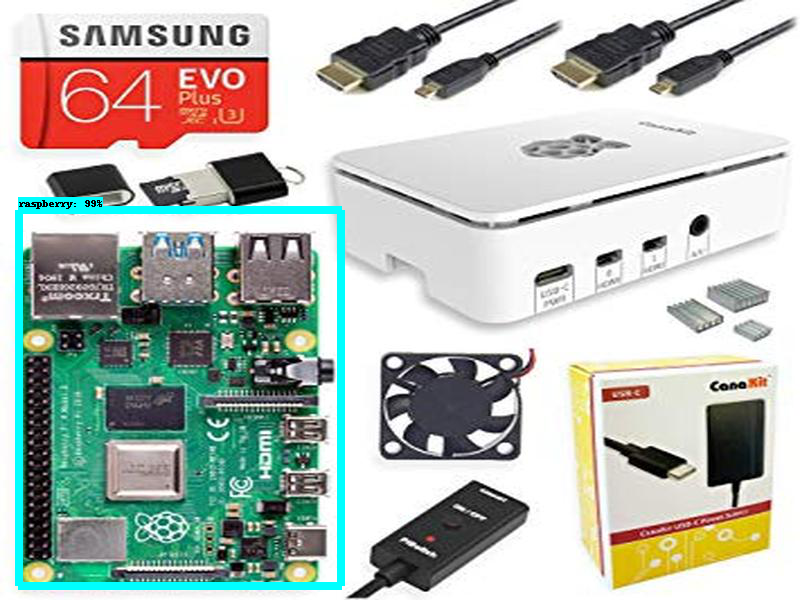

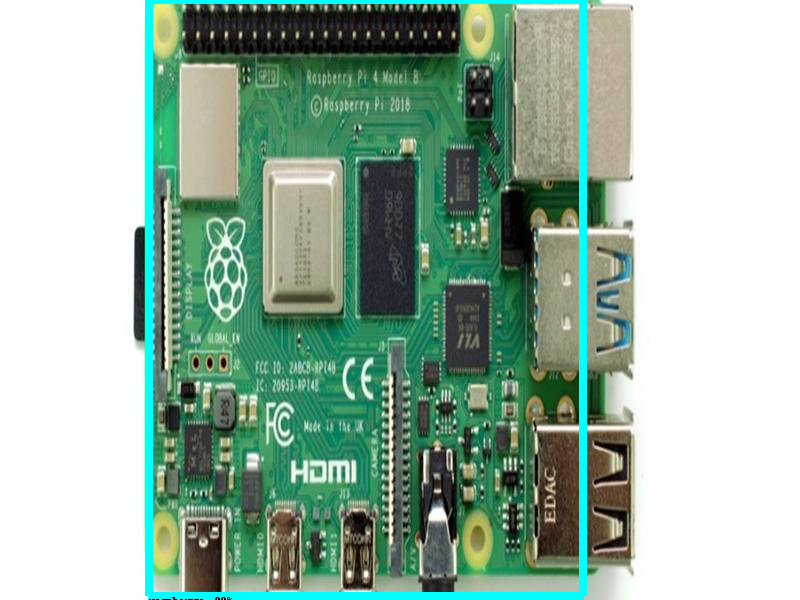

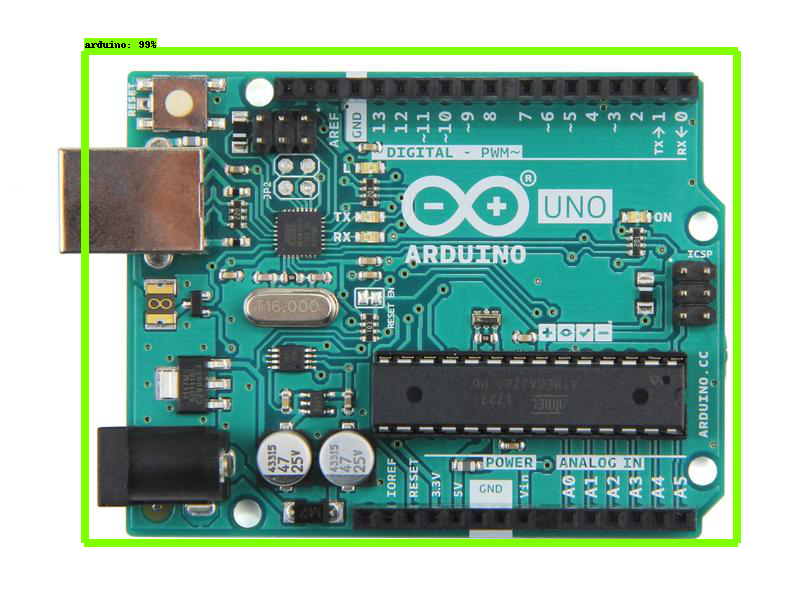

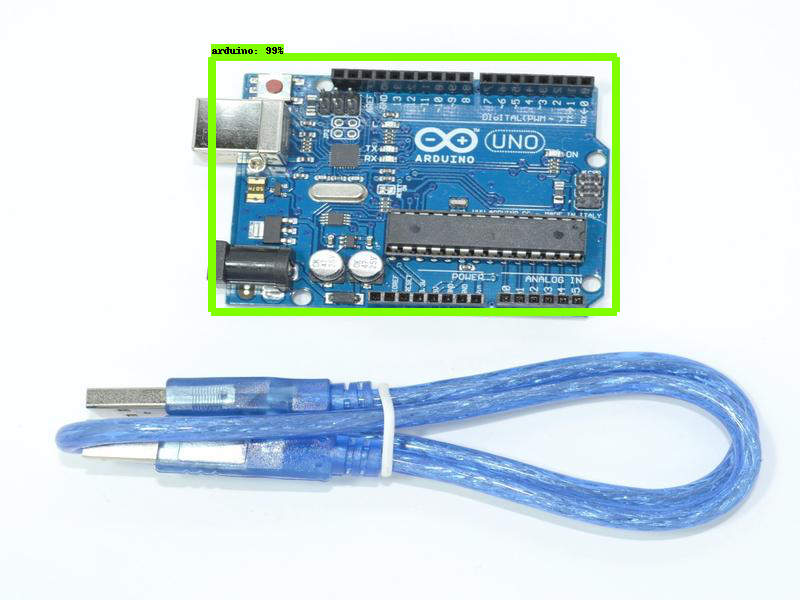

In [86]:
for image_path in TEST_IMAGE_PATHS:
  show_inference(detection_graph, image_path)

In [88]:
print("That's ALL")

That's ALL
